# Caracterización de cáncer en tejidos de higado mediante reflectancia difusa

## 1. Reflectancia difusa para la detección de tejidos tumorales

La espectroscopía de reflectancia difusa permite obtener información relevante de muestras biológicas de forma no invasiva. La idea básica se muestra en la Fig.1. Se envía un haz de luz de cierto contenido espectral, por ejemplo, luz blanca, y se analiza la luz retrodifundida por el tejido.

![ref dif](fig1refdifhigado.png)

Se obtiene así un espectro de reflectancia $R(\lambda)=I_R(\lambda)/I_0(\lambda$), donde $I_0(\lambda$) e $I_R(\lambda)$ representan la intensidad incidente y reflejada difusa, respectivamente. No referimos a esta reflectancia como reflectancia difusa debido a que la luz o radiación que emerge del tejido ha experimentado muchos eventos de absorción y scattering por las moléculas y estructuras celulares que constituyen el mismo. En su camino cada componente de haz incidente se desviará de su trayectoria y será parcial o totalmente absorbido. Los cambios experimentados por las diferentes componentes espectrales de la luz incidente llevarán información del tipo y de la concentración de moléculas en el tejido y de los tamaños de las estructuras que lo componen.
El montaje típico se muestra en la figura: una fuente de luz blanca ilumina un mazo de fibras  compuesta de una fibra centrar que transporta la radiación hasta el tejido.

![ref dif 2](fig2refdifhigado.png)

La reflectancia difusa de  un tejido contiene información sobre la variación bioquímica y estructural que ocurre enun tejido cuando progresa  un proceso patológico como por ejemplo el cáncer. Por ello se puede emplear en el diagnóstico de diferentes enfermedades incluyendo el cáncer de mama [a], cáncer cervical [x], cáncer oral [y], cáncer de colon r [z], cáncer de piel [v], cáncer de higado [b],  cáncer de próstata [c], y esófago de Barret [d]. 


![ref dif 3](fig3refdifhigado.png)



## 2. Modelo de absorción, scattering y reflectancia para el higado

En el caso de metástasis en el hígado, la única solución es la resección. El problema es la determinación de los márgenes del tejido tumoral. El análisis histopatológico constituye la regla de oro standard para determinar los márgenes del tumor. Por ello, la posibilidad de realizar un análisis durante la intervención quirúrgica sería de gran interés porque evitaría la necesidad de posteriores intervenciones. La reflectancia difusa puede realizar  esta operación de análisis in situ.

Vamos a aplicar el esquema anterior al caso de  una medida de reflectancia difusa de un tejido de higado que se muestra en la figura y que ha sido extraido después de una resección quirúrgica. La figura presenta una muestra de un tumor en el hígado y el tejido sano circundante. Se trata de tomar una medida de reflectancia difusa de la región de tejido sano y compararla con otra medida de reflectancia difusa de la región de tejido tumoral y analizar si existen diferencias significativas de los diferentes parámetros ópticos del tejido (fracciones en volumen de cromóforos, amplitud de scattering, etc).  En este ejemplo se extiende la espectroscopía desde el visible al infrarojo ( 500-1600 nm). Este rango permite introducir en el modelo de absorción los cromóforos en el IR tales como el agua o los lípidos.  Además de esto parámetros, incluiremos la sangre, el radio medio y las propiedades de scattering a traves de un modelo  analítico que conjuga scattering Rayleigh y Mie.

Los cromóforos relevantes en este caso son  son la sangre, con una fración en volume **fs**, la bilirrubina, con una fracción **fB** y **fWL** la fracción del complejo agua-lípidos. A su vez, la sangre se compone de hemoglobina y oxihemoglobina, con una fraccion de oxigeno en sangre dada por **S**.  El contenido en lípidos es **fL**.   El esquema del montaje incorpora dos espectrómetros, uno para el visible y otro para el infrarojo.  La fuente de luz debe tanbien emitir en una amplio rango que cubra ambas zonas del espectro.

![ref dif 4](fig4refdifhigado.png)

Los datos de los espectros del tejido sano y tumoral medido con este montaje se dan en los ficheros
*Tejido_Normal.dat* y *Tejido_Tumoral.dat*, respectivamente.

### 2.1 1 Coeficiente de absorción del tejido del hígado

![ref dif 5](fig5refdifhigado.png)

El coeficiente total del tejido de hígado, habida cuenta de los componentes esenciales que hemos comentado, se podrá poner como:

$$\mu_a(\lambda)= f_s\left[S\mu^{ox}_a(\lambda)+ (1-S)\mu^{Hem}_a(\lambda)\right]+ f_{B}\mu^{B}_a(\lambda)
+f_{WL}\left[f_L \mu^{L}_a(\lambda)+ (1-f_L)\mu^{Agua}_a(\lambda)\right]$$

La ecuación anterior asume que toda la estructura de vasos sanguíneos es uniforme. Pero este no suele ser l caso. Existen capilares de tamaño hasta venas de tamañoe varias micras. Por ello podemos ponderar el
efecto de esta distribución de tamaños de los vasos y capilares de la red sanguínea calculando un coeficiente
**C(l)** que represente la media de la transmitancia a tavés de una red de capilares cuyos espesores varián entre 0 y un cierto valor máximo R, tal como se indica en la figura de abajo.

![ref dif 6](fig6refdifhigado.png)

En ese caso, el coeficiente de absorción se modificará de acuerdo con la expresión,

$$\mu_a(\lambda)= C(\lambda) f_s\left[S\mu^{ox}_a(\lambda)+ (1-S)\mu^{Hem}_a(\lambda)\right]+ f_{B}\mu^{B}_a(\lambda)
+f_{WL}\left[f_L \mu^{L}_a(\lambda)+ (1-f_L)\mu^{Agua}_a(\lambda)\right]$$

En los ficheros *muHemo.dat*, y *muOxy.dat* se dan coeficientes de absorción lineal (en cm$^{-1}$ ) de la
hemoglobina y oxihemoglobina, respectivamente. Los coeficientes de absorción lineal del agua y del
tejido lipídico se dan en los ficheros *muAgua.dat* y *muLipidos.dat* y el fichero de la bilirububina se da en
*muBilis.dat* y se muestran ejecutando el código mostrado a continuación.




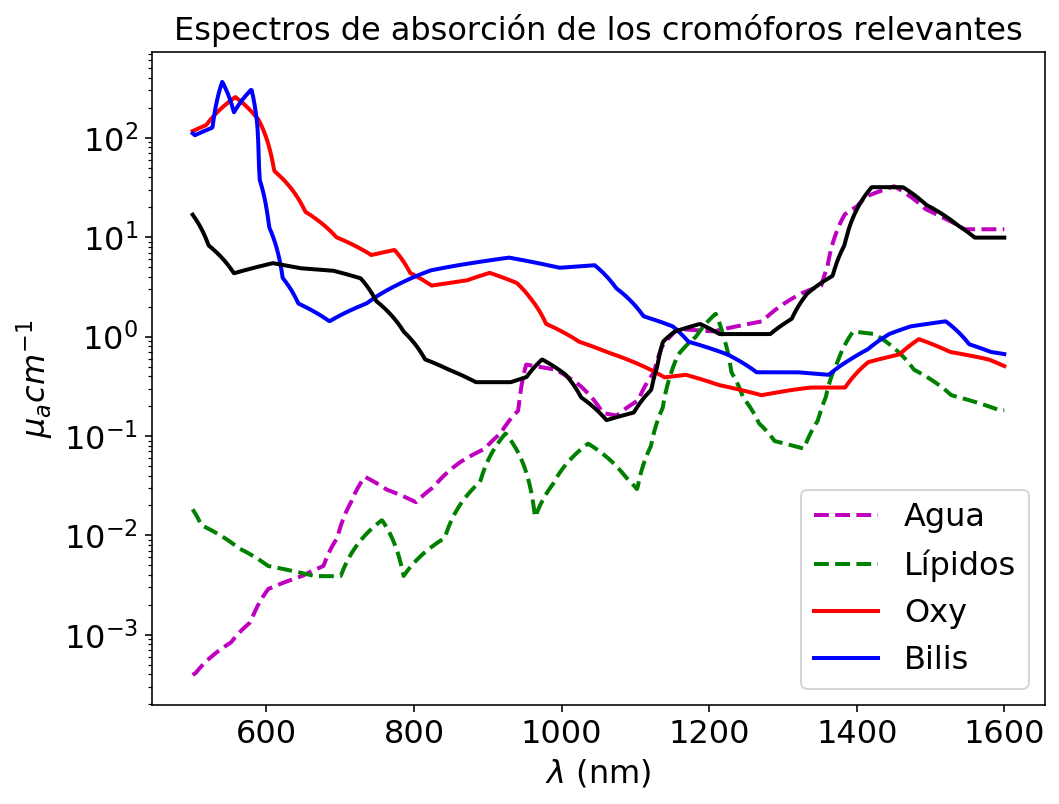

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#--------------------------------------------------------------------------#
A=np.loadtxt('muAgua.dat')
landa=A[:,0]
muAgua=A[:,1]

B=np.loadtxt('muLipidos.dat')
muLipidos=B[:,1]

C=np.loadtxt('muHemo.dat')
muHemo=C[:,1]

D=np.loadtxt('muOxy.dat')
muOxy=D[:,1]

E=np.loadtxt('muBilis.dat')
muBilis=E[:,1]
#----------------------------------------------------------
fig = plt.figure(figsize=(8,6))
plt.semilogy(landa, muAgua, 'm--',linewidth=2)
plt.semilogy(landa, muLipidos, 'g--',linewidth=2)
plt.semilogy(landa, muHemo, 'r',linewidth=2)
plt.semilogy(landa, muOxy, 'b',linewidth=2)
plt.semilogy(landa, muBilis, 'k',linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$\mu_{a}  cm^{-1}$',fontsize=16)
plt.legend(('Agua','Lípidos','Oxy','Bilis'),fontsize=16)
plt.title('Espectros de absorción de los cromóforos relevantes',fontsize=16);
plt.tick_params(labelsize=16)

### 2.2. Influencia de la bilirrubina

En muchos tejidos, como la piel o el tejido de mama, no se incluye la bilirrubina. En el caso del higado es
una sustancia relevante ya que el hígado es productor de bilirrubina y puede cambiar en el caso de tejido
tumoral. Para ver que la bilirrubina, de existir en un tejido, es importante, vamos a representar los espectros
normalizados de la sangre y la bilirrubina para ver que compiten en la zona de 450-600 nm.

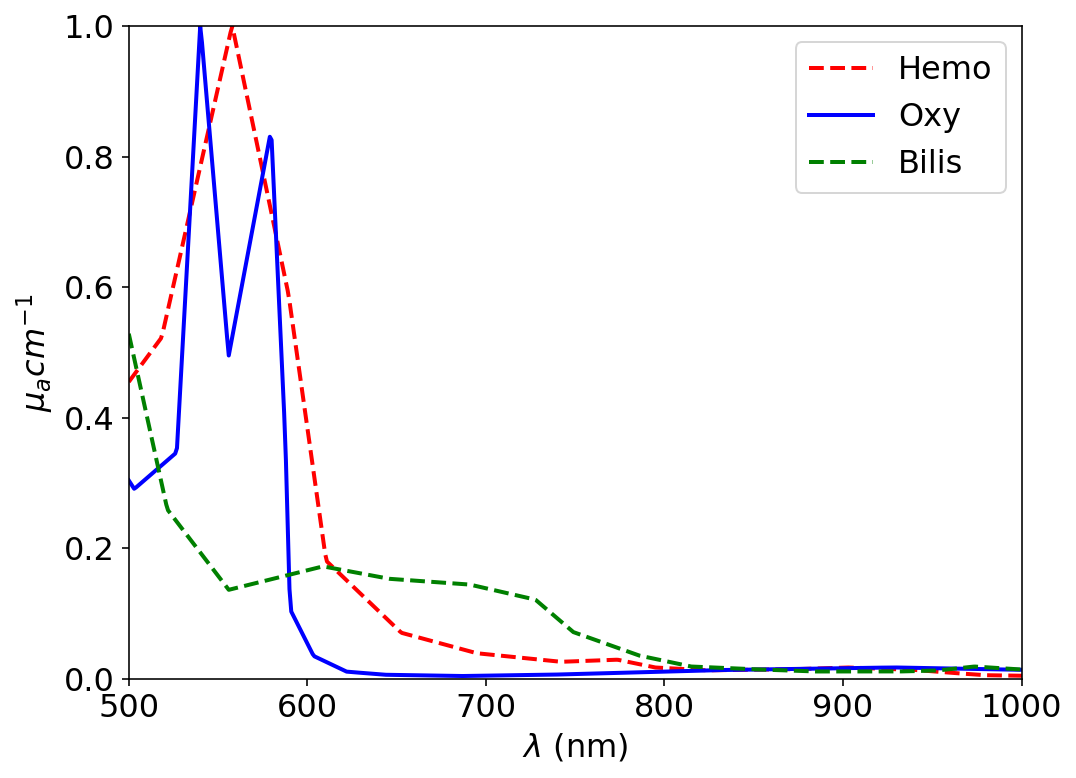

In [12]:
import numpy as np
import matplotlib.pyplot as plt
  
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         #
#--------------------------------------------------------------------------#
C=np.loadtxt('muHemo.dat')
landa=C[:,0]
muHemo=C[:,1]
muHemo=C[:,1]/max(muHemo)


D=np.loadtxt('muOxy.dat')
muOxy=D[:,1]
muOxy=D[:,1]/max(muOxy)

E=np.loadtxt('muBilis.dat')
muBilis=E[:,1]
muBilis=E[:,1]/max(muBilis)
 

fig = plt.figure(figsize=(8,6))
plt.plot(landa, muHemo, 'r--',linewidth=2)
plt.plot(landa, muOxy, 'b',linewidth=2)
plt.plot(landa, muBilis, 'g--',linewidth=2)
plt.legend(('Hemo','Oxy','Bilis'),fontsize=16)
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('$\mu_{a}  cm^{-1}$',fontsize=16)
plt.xlim(500,1000)
plt.ylim(0,1)
plt.tick_params(labelsize=16)

En efecto, se ve que la bilirrubina compite en la absorción con la oxihemoglobina y hemoglobina en la zona de
500-600 nm. De no incluirlo, los resultados del ajuste al modelo falsearía la importancia de la sangre. Por otro lado, en la zona de 600-700 nm, la bilirrubina absorbe más que la sangre.


### 2.3 Coeficiente de scattering  del tejido del higado

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 micras. 


![ref dif 7](fig7refdifhigado.png)

Ello hace que debamos formular un modelo de scattering que incluya el scattering Rayleigh y el Mie:

$$\mu'_s(\lambda)= a \left[f_R \left(\frac{\lambda}{\lambda_0} \right)^{-4 }  +(1-f_R) \left(\frac{\lambda}{\lambda_0} \right)^{-b }\right]$$



## 3. Esquema del procedimiento de ajuste no lineal

Una vez formulado el modelo de absorción y de scattring para el tejido en cuestión, debemos realizar un ajuste entre los datos de la reflectancia experimental y la reflectancia que suministra enl modelo teórico, a partir de unos valores semilla que incorporaremos al programa para que se inicie la comparación entre el modelo y los datos experimentales.  El esquema se muestra en la figura:

![ref dif 8](fig8refdifhigado.png)

### 3.1 Algoritmo de inversion

Los parámetros libres del modelo de tejido de higado, se pueden obtener mediante un ajuste inverso.  El diagrama de flujo del programa se muestra en la figura de arriba. Los pasos para realizar el programa son:

* Paso 1: Se introducen unos valores iniciales para los parámeros desconocidos , fRay,b, B, S, fWL, fL, R,

* Paso 2: Se cargan los espectros de absorción de los componentes y se calcula el coeficiente de absorción del tejido y el coeficiente de scattering a partir de las ecuaciones  de más arriba. 

* Paso 3: Se lleva a cabo una búsqueda del mínimo de la funcion error entre el modelo teórico y la reflectancia experimental con el comando fminsearch de matlab.De este ajuste, se obtienen los parámetros del tejido.

(0, 1)

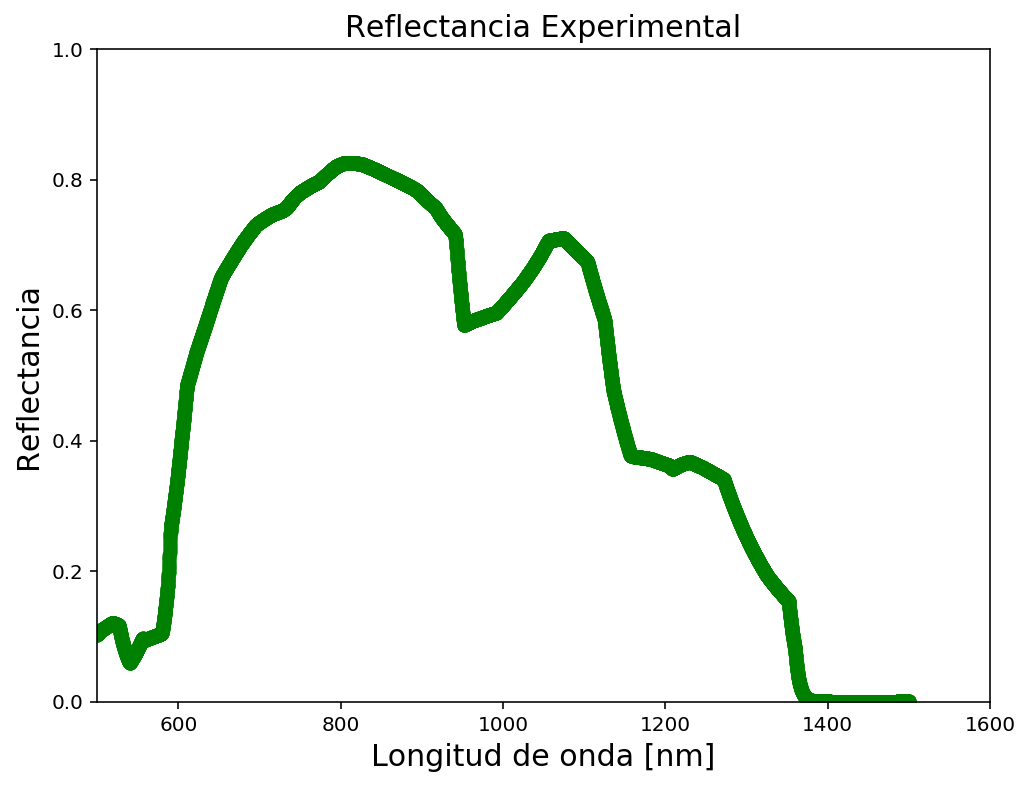

In [3]:
# ######################################################################## 
# PROGRAMA_GENERAL
# USA FUNCIONES: Funcion_ajusteHigadoqq
#
# El programa ajusta el espectros de reflectancia difusa de la piel 
# a un modelo descrito en la función funcionerror_piel400_Mie_Ray
#--------------------------------------------------------------------------
# El programa ajusta el espectros de reflectancia difusa de la piel 
# Programa para los alumnos de óptica biomédica del curso 2015/16

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size=15) 
########CARGA DE FICHEROS DE ESPECTROS DE LOS CROMOFOROS RELEVANTES##########
H=np.loadtxt('Tejido_Normal.dat') #Espectro de reflectancia experimental
H=np.loadtxt('Tejido_Tumoral.dat')
landa_exp = H[:,0]       #longitudes de onda del espectro experimental.
R_higado=H[:,1]          #ESPECTRO DE REFLECTANCIA EXPERIMENTAL DE LA PIEL (dividido entre 100).
#--------------------------------------------------------------------------
fig = plt.figure(figsize=(8,6))
plt.plot(landa_exp, R_higado,'go')

     
plt.xlabel('Longitud de onda [nm]',fontsize=15)          
plt.ylabel('Reflectancia',fontsize=15)                   
ymax = 1
plt.title('Reflectancia Experimental',fontsize=15)
plt.xlim(500,1600)
plt.ylim(0, ymax)

<ipython-input-8-484bafd731f5>:72: RuntimeWarning: invalid value encountered in sqrt
  delta = np.sqrt(D/muaTejido)


Optimization terminated successfully.
         Current function value: 0.216364
         Iterations: 2797
         Function evaluations: 4028


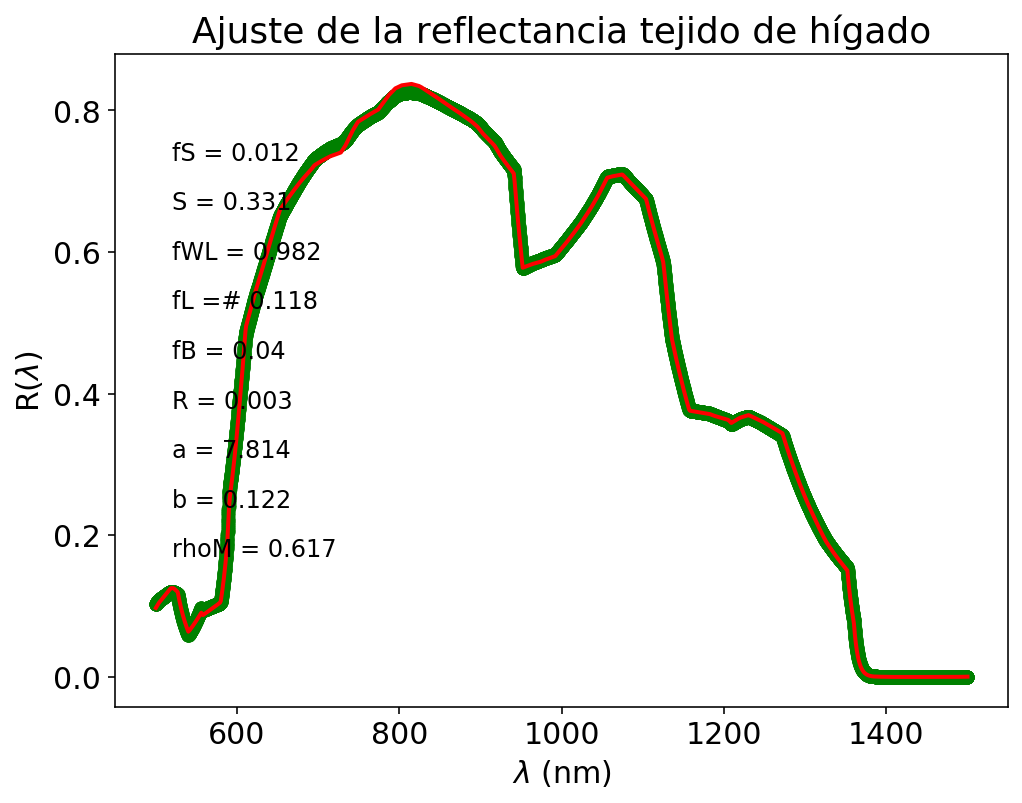

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size=15)
########CARGA DE FICHEROS DE ESPECTROS DE LOS CROMOFOROS RELEVANTES##########
H=np.loadtxt('Tejido_Normal.dat') #Espectro de reflectancia experimental
H=np.loadtxt('Tejido_Tumoral.dat')
landa_exp = H[:,0]       #longitudes de onda del espectro experimental.
R_higado=H[:,1]          #ESPECTRO DE REFLECTANCIA EXPERIMENTAL DE LA PIEL (dividido entre 100).
#----------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA
#----------------------------------------------------------#
A=np.loadtxt('muAgua.dat')
landa=A[:,0]
muAgua=A[:,1]

B=np.loadtxt('muLipidos.dat')
muLipidos=B[:,1]

C=np.loadtxt('muHemo.dat')
muHemo=C[:,1]

D=np.loadtxt('muOxy.dat')
muOxy=D[:,1]

E=np.loadtxt('muBilis.dat')
muBilis=E[:,1]

## --------------------------------------------------------------###
## FUNCION ERROR #########
##
def Funcion_ajusteHigado(start, landa_exp, R_higado, landa, muAgua, muLipidos, muHemo, muOxy,muBilis):
    
    fS=start[0]    # Fracción en volumen de sangre en el tejido de  higado
    S=start[1]     # Saturación de oxigeno en sangre(mezcla de sangre arterial y venosa)
    fWL=start[2]
    fL=start[3]
    fB=start[4]
    R=start[5]    # Radio medio de la red de capilares en  cm.
    #-----Scattering-----------------------------------------------------------
    a=start[6]     #Amplitud de scattering
    b=start[7]     #Pendiente del scattering Mie
    rhoM=start[8]  #Fraccion de scattering Mie

    ###########################################################################
    # MODELO DE ABSORCION DE LA HEMOGLOBINA, OXIHEMOGLOBINA, AGUA Y MELANINA  #
    ###########################################################################

    #ESPECTROS INTERPOLADOS A landa_exp
    muAgua=np.interp(landa_exp,landa,muAgua)
    muHemo=np.interp(landa_exp,landa,muHemo)
    muOxy=np.interp(landa_exp,landa,muOxy)
    muBilis=np.interp(landa_exp,landa,muBilis)
    muLipidos=np.interp(landa_exp,landa,muLipidos)
    #----------------------------------

    muS=fS*(S*muOxy +(1-S)*muHemo)
    Cs=(1-np.exp(-2*R*muS))/(2*R*muS)

    muSangre=fS*Cs*(S*muOxy +(1-S)*muHemo)
    muWL=fWL*(fL*muLipidos+ (1- fL)*muAgua)

    muaTejido=muSangre+muWL+ 1*fB*muBilis

    landa_0=800 
    musp=a*(rhoM*(landa_exp/landa_0)**(-b)+ (1-rhoM)*(landa_exp/landa_0)**(-4))

    #######MODELO DE REFLECTANCIA######################
    r = 0.24 #distancia entre las fibras cm
    As=1
    zo = 1/(muaTejido + musp)
    D = zo/3
    delta = np.sqrt(D/muaTejido)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*As*D)**2 + r**2)
    mueff = 1/delta
    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*As*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
    R_teorica =(musp)/(4*np.pi*(musp+muaTejido))*( c + d )

    #FUNCION ERROR
    err = sum( (R_teorica - R_higado)**2 )   #funcion error que se quiere minimizar en todo el intervalo espectral
    if S<0.0: 
        err = err*10 #rebaja las exigencias de precisi�n al dar una locura (S<01 no puede ser)
    if fWL>1.0: 
        err = err*10 #rebaja las exigencias de preciesi�n al dar una locura (S<01 no puede ser)
    if rhoM>1.0:
        err = err*10 #rebaja las exigencias de preciesi�n al dar una locura (S<01 no puede ser)
    if R<0: 
        err = err*10 #rebaja las exigencias de preciesi�n al dar una locura (S<01 no puede ser)
    return err
    


#--------------------------------------------------------------------------
#                            AJUSTE DE LOS DATOS                        #
#--------------------------------------------------------------------------
    
#VALORES DE PARTIDA APROXIMADOS PARA REALIZAR EL AJUSTE
fS=0.03   #Fracción en volumen de sangre en el tejido de  higado
S= 0.37   #Saturación de oxigeno en sangre(mezcla de sangre arterial y venosa)
fWL=0.93  #Fracción en volumen del complejo agua_lipidos
fL=0.10   #Fracción en volumen de lípidos
fB=0.039  #Fracción en volumen de bilirubina
R=56*1e-4 #Radio medio de la red de capilares en  cm.

#----- Valores para el Scattering------------------------------------
a=14.5    #Amplitud de scattering
b=1       #Potencia del scattering Mie
rhoM=0.25 #Fraccion de scattering Mie

#vector de valores iniciales  de los parámetros de ajuste.
start = [fS, S, fWL, fL, fB, R, a, b, rhoM]

#####FUNCIÓN DE AJUSTE###############################
from scipy.optimize import fmin


result = fmin(Funcion_ajusteHigado, x0= start, args=(landa_exp,R_higado, landa, muAgua, muLipidos, muHemo, muOxy,muBilis),maxiter=5000,xtol=1e-6,ftol=1e-6)

#------------ Dibujamos las soluciones--------------------------------
#Resultado del ajuste se encuentra en la variable result   anterior.
fS=result[0]    
S=result[1]     
fWL=result[2]
fL=result[3]
fB=result[4]
R=result[5]    
#-----Datos del Scattering-----------------------------------------------------------
a=result[6]     #Amplitud de scattering
b=result[7]     #potencia del scattering Mie
rhoM=result[8] 

#------------ESPECTROS INTERPOLADOS A ''landa_in''
muAgua=np.interp(landa_exp,landa,muAgua)
muHemo=np.interp(landa_exp,landa,muHemo)
muOxy=np.interp(landa_exp,landa,muOxy)
muBilis=np.interp(landa_exp,landa,muBilis)
muLipidos=np.interp(landa_exp,landa,muLipidos)
#-----------------------------------------------                     

#--------Absorcion------------------------------
muS=fS*(S*muOxy +(1-S)*muHemo)
Cs=(1-np.exp(-2*R*muS))/(2*R*muS)
muSangre=fS*Cs*(S*muOxy +(1-S)*muHemo)
muWL=fWL*(fL*muLipidos+ (1- fL)*muAgua)
muaTejido=muSangre+muWL+ 1*fB*muBilis
#-----------Scattering---------------------------------------
landa_0=800 
musp=a*(rhoM*(landa_exp/landa_0)**(-b)+ (1-rhoM)*(landa_exp/landa_0)**(-4))

##--------------MODELO DE REFLECTANCIA-------------------------
r = 0.24 #0.248#0.248  #distancia entre las fibras cm
n =1.38
ri= 0.668 + 0.0636*n + 0.710/n - 1.440/n**2 #reflexión 
As = (1 + ri)/(1 - ri) # condición de contorno. reflectancia efectiva
As=1
zo = 1/(muaTejido + musp)
D = zo/3
delta = np.sqrt(D/muaTejido)
r1 = np.sqrt(zo**2 + r**2)
r2 = np.sqrt((zo + 4*As*D)**2 + r**2)
mueff = 1/delta
c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
d = (zo + 4*As*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
R_teorica =(musp)/(4*np.pi*(musp+muaTejido))*( c + d )
#-------------------------------------------------------------------

fig = plt.figure(figsize=(8,6))
plt.plot(landa_exp, R_higado, 'go')

plt.plot(landa_exp, R_teorica, 'r-',linewidth=2)

plt.xlabel('$\lambda$ (nm)')
plt.ylabel('R($\lambda$)')
plt.title('Ajuste de la reflectancia tejido de hígado')

x = 520
ymax = 0.8
dy = .07
sz=12
plt.text(x, ymax - dy, 'fS = '+ str(np.round(fS,3)),fontsize=sz)
plt.text(x, ymax - 2*dy, 'S = '+ str(np.round(S,3)),fontsize=sz)
plt.text(x, ymax - 3*dy, 'fWL = '+ str(np.round(fWL,3)),fontsize=sz)
plt.text(x, ymax - 4*dy, 'fL =# '+ str(np.round(fL,3)),fontsize=sz)
plt.text(x, ymax - 5*dy, 'fB = '+ str(np.round(fB,3)),fontsize=sz)
plt.text(x, ymax - 6*dy, 'R = '+ str(np.round(R,3)),fontsize=sz)
plt.text(x, ymax - 7*dy, 'a = '+ str(np.round(a,3)),fontsize=sz)
plt.text(x, ymax - 8*dy, 'b = '+ str(np.round(b,3)),fontsize=sz)
plt.text(x, ymax - 9*dy, 'rhoM = '+ str(np.round(rhoM,3)),fontsize=sz);
  


### 3.2  Clasificación de tejidos 

Como se puede apreciar existe una variación notable en algunos parámetros que permite diferencia los tejidos sanos del tejido canceroso. Los parámetros estimados en promedio en una muestra de 120 casos se muestra en la tabla.

"Effect of bile absorption coefficients on the estimation of liver tissue optical properties and related implications in discriminating healthy and tumorous samples"
Rami Nachabé, Daniel J. Evers, Benno H. W. Hendriks, Gerald W. Lucassen, Marjolein van der Voort, Jelle Wesseling, and Theo J. M. Ruers
1 March 2011 / Vol. 2, No. 3 / BIOMEDICAL OPTICS EXPRESS 600

![refdifhigado](fig9refdifhigado.png)

 Los parámetros más importantes desde el punto de vista estadístico son la amplitud de scattering y la fracción en volumen de bilirubina (p<0.0001).  Como se muestra en la tabla, los tejidos sanos presentan una fracción de bilirubina 5 veces mayor que en el tejido tumoral, mientras que el coeficiente reducido de scattering tiene una valor del orden de dos veces el del tejido sano. El tejido de hígado sano  está constituido por hepatocitos que están ordenados en capas separadas por finas capas que permiten el flujo de sangre, permitiendo la perfusión de bilis a través del hígado. En el tejido tumoral esta estructura se desmorona  impidiendo parcialmente la perfusión de la bilis y una alteración de las estructuras de la celulares aumenta el scattering.
 
![refdifhigado](fig10refhigado.png)
 
 Basados en estos 5 parámetros se puede construir un árbol de decisión para las medidas de Reflectancia Difusa cuando se comparan con los estudios histopatológicos: Un total de 780 medidas ópticas de 828  fueron clasificadas correctamente tanto en hígado normal como canceroso, lo que da una sensitividad  y especificidad del 94%.
 
![refdifhigado](fig11refhigado.png)
 
 